# ***Mapping the Landscape of Generative AI Research through***
# ***Web of Science***

## Foundation of Data Analytics Project 3

In [2]:
# Import necessary libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


# Download necessary NLTK data (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive/')
# Set working directory
%cd /content/drive/MyDrive/FDA_Project_3/

Mounted at /content/drive/
/content/drive/MyDrive/FDA_Project_3


In [ ]:
# Read and Display FDA Project 2 data
df_articledata = pd.read_csv('FDA_Project3.csv')
df_articledata

In [5]:
#Extracting only Article Title and Author Keywords from the data
df_Keyworddata = df_articledata[['Article Title','Author Keywords']]
df_Keyworddata

,Article Title,Author Keywords
0,Architecting Novel Interactions With Generativ...,HCI; AI; Generative AI; Human-AI Interaction
1,Blockchain-based auditing of legal decisions s...,Legal; Law; Explainable AI; Blockchain; Genera...
2,"Observe, inspect, modify: Three conditions for...",AI governance; AI regulation; generative AI; g...
3,Generative AI Futures: A Speculative Design Ex...,Speculative Design; Generative AI; Creativity;...
4,Generative AI Considered Harmful,Large Language Models; LLM; GPT-3; GPT-4; Chat...
...,...,...
1669,mHealth Intervention to Promote Physical Activ...,eHealth; behavioral change; mobile phone; smar...
1670,"Big Data, Proxies, Algorithmic Decision-Making...",algorithms; big data; corporate empiricism; pe...
1671,A survey on deep learning for skin lesion segm...,Skin lesion; Deep learning; Segmentation; Survey
1672,The challenges and opportunities of developing...,NaN


In [6]:
#Using dataframe df_Keyworddata: split Author Keywords column into multiple columns to form the dataframe with each article keywords listed

new_columns = df_Keyworddata['Author Keywords'].str.split(';', expand=True)
df_Keyworddata = pd.concat([df_Keyworddata, new_columns], axis=1)
#df_Keyworddata = df_Keyworddata.drop('Author Keywords', axis=1)
df_Keyworddata


,Article Title,Author Keywords,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,Architecting Novel Interactions With Generativ...,HCI; AI; Generative AI; Human-AI Interaction,HCI,AI,Generative AI,Human-AI Interaction,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Blockchain-based auditing of legal decisions s...,Legal; Law; Explainable AI; Blockchain; Genera...,Legal,Law,Explainable AI,Blockchain,Generative AI,Responsible AI,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"Observe, inspect, modify: Three conditions for...",AI governance; AI regulation; generative AI; g...,AI governance,AI regulation,generative AI,generative models,inspectability,large language models,modifiability,observability,...,None,None,None,None,None,None,None,None,None,None
3,Generative AI Futures: A Speculative Design Ex...,Speculative Design; Generative AI; Creativity;...,Speculative Design,Generative AI,Creativity,Embodiment,Futures Studies,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Generative AI Considered Harmful,Large Language Models; LLM; GPT-3; GPT-4; Chat...,Large Language Models,LLM,GPT-3,GPT-4,ChatGPT,generative AI,text generation,natural language,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,mHealth Intervention to Promote Physical Activ...,eHealth; behavioral change; mobile phone; smar...,eHealth,behavioral change,mobile phone,smartphone,mHealth,mobile health,app,apps,...,satisfaction,feasibility,acceptability,None,None,None,None,None,None,None
1670,"Big Data, Proxies, Algorithmic Decision-Making...",algorithms; big data; corporate empiricism; pe...,algorithms,big data,corporate empiricism,performativity,proxies,scaling,technology,theory,...,None,None,None,None,None,None,None,None,None,None
1671,A survey on deep learning for skin lesion segm...,Skin lesion; Deep learning; Segmentation; Survey,Skin lesion,Deep learning,Segmentation,Survey,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1672,The challenges and opportunities of developing...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# A List of all Author Keywords
df_Keywords = df_Keyworddata[['Author Keywords']]
df_Keywords

,Author Keywords
0,HCI; AI; Generative AI; Human-AI Interaction
1,Legal; Law; Explainable AI; Blockchain; Genera...
2,AI governance; AI regulation; generative AI; g...
3,Speculative Design; Generative AI; Creativity;...
4,Large Language Models; LLM; GPT-3; GPT-4; Chat...
...,...
1669,eHealth; behavioral change; mobile phone; smar...
1670,algorithms; big data; corporate empiricism; pe...
1671,Skin lesion; Deep learning; Segmentation; Survey
1672,NaN


In [8]:
#Converting the keywords to a list of lists
Keylist = df_Keywords.values.tolist()
Keylist

[['HCI; AI; Generative AI; Human-AI Interaction'],
 ['Legal; Law; Explainable AI; Blockchain; Generative AI; Responsible AI'],
 ['AI governance; AI regulation; generative AI; generative models; inspectability; large language models; modifiability; observability; regulatory objects'],
 ['Speculative Design; Generative AI; Creativity; Embodiment; Futures Studies'],
 ['Large Language Models; LLM; GPT-3; GPT-4; ChatGPT; generative AI; text generation; natural language; NLP; NLG'],
 ['Generative AI; innovation diffusion; TOE framework'],
 ['Generative AI; Telecom; 6 G; 5 G; Survey; Application'],
 ['Generative AI; Large language models; Generative adversarial networks; Harms; Power; Inequality'],
 ['Self-Healing Systems; Generative AI; Anomaly Detection; Code Generation'],
 ['UTAUT; Generative AI; AI anxiety; creative professionals'],
 ['Generative AI; ChatGPT; Pedagogical agents; Socratic tutors; Simulations'],
 ['generative AI; ChatGPT; legal regulation; ethical principle; algorithm; data

In [18]:
# Flatten the nested list
flat_keyword_list = [keyword for sublist in Keylist for keyword in sublist]

# Extract unique keywords
all_keywords = set(flat_keyword_list)

# Convert the unique keywords back to a list if needed
keyword_list = list(all_keywords)

# Print the unique keywords
print(keyword_list)


['GAN-generated images detection; GAN image localization; detection of computer-generated images; fake AI-generated images recognition; fake and real detection; convolutional neural networks', 'Information extraction; text summarization; lengthy legal contracts; zero-resource; large language models; unsupervised approach', 'Birds; Task analysis; Predictive models; Image color analysis; Computational modeling; Vegetation; Shape; Explainable AI; interpretable ML; computer vision; generative models; information theory', 'Transformer neural networks; Self-attention; Sparse attention; Ensemble methods; Information pathway', 'Generative conversational AI agent; Information quality; Novelty seeking; Ethical concerns; Decision-making efficiency; Innovation performance', 'Cognitive absorption; Chatbots; Generative artificial intelligence; Anthropomorphism; Qualitative comparative analysis; Artificial intelligence', 'Thyroid nodules; Risk stratification; ChatGPT; AI; Ultrasound', 'probabilistic 

In [19]:
# Tokenize the text into words
tokens = word_tokenize('keyword_list')

# Convert to lower case
#tokens = [word.lower() for word in tokens]

# Remove punctuation and numbers
tokens = [word for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Calculate frequency distribution
#freq_dist = FreqDist(tokens)

# Convert frequency distribution to a DataFrame
#df = pd.DataFrame(freq_dist.most_common(), columns=['Word', 'Frequency'])

# Display the DataFrame
tokens

[]

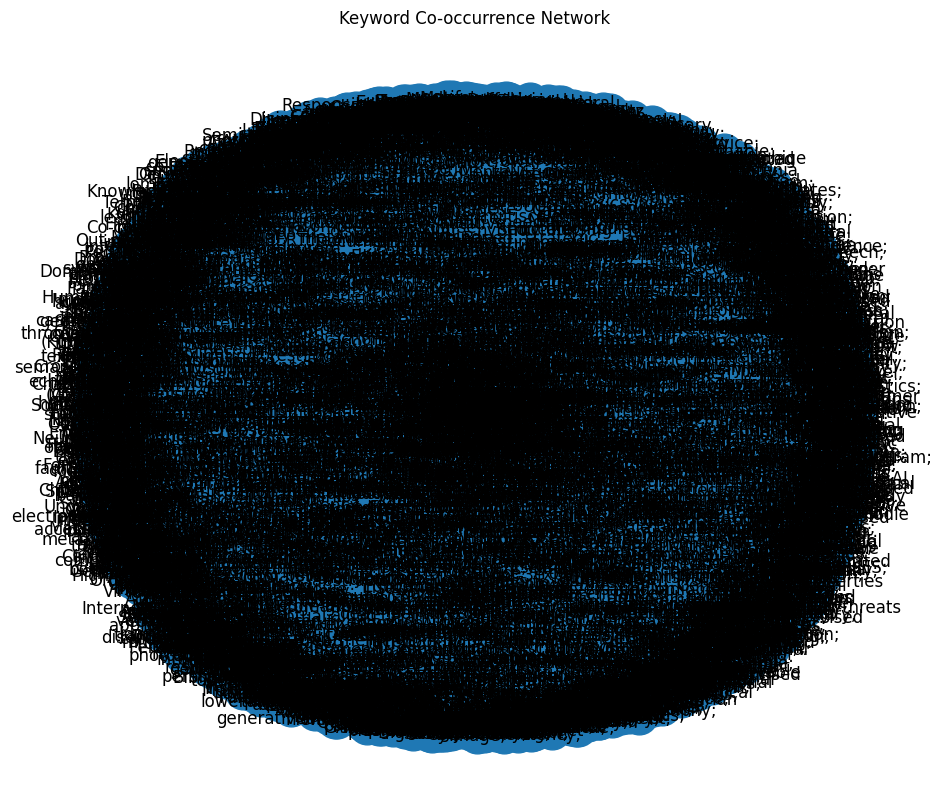

,Source,Target,Weight
17023,intelligence;,artificial,193
10262,AI;,Generative,123
7764,generative,adversarial,113
17047,intelligence;,ChatGPT;,105
7746,generative,AI;,101
...,...,...,...
27609,learning,bladder;,1
27610,learning,Temporal,1
27611,learning,AutoEncoder;,1
27612,learning,Action,1


In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Filter out non-string elements and flatten Keylist
flat_keylist = [keyword for sublist in keyword_list for keyword in (sublist if isinstance(sublist, list) else [sublist]) if isinstance(keyword, str)]

# Tokenize the flattened list
tokenized_lists = [keyword.split() for keyword in flat_keylist]

# Build co-occurrence network
G = nx.Graph()

for list_ in tokenized_lists:
    for item1, item2 in itertools.combinations(set(list_), 2):
        if G.has_edge(item1, item2):
            G[item1][item2]['weight'] += 1
        else:
            G.add_edge(item1, item2, weight=1)

# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
edges = G.edges(data=True)
edge_width = [d['weight']*0.5 for _, _, d in edges]  # Scale edge widths by weight
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_width)

# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Keyword Co-occurrence Network")
plt.axis('off')
plt.show()

edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)
edges_df_sorted
